<a href="https://colab.research.google.com/github/akarshpyr/Python-codes/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy

In [2]:
from sklearn.cluster import AgglomerativeClustering

In [3]:
data = pd.read_csv('/content/crime_data.csv')

In [4]:
data.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Murder      0.393956
Assault     0.234410
UrbanPop   -0.226009
Rape        0.801200
dtype: float64

In [5]:
def norm_func(i):
  x = (i - i.min())/(i.max()-i.min())
  return (x)


In [6]:
data_norm = norm_func(data.iloc[:,1:])

In [7]:
data_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


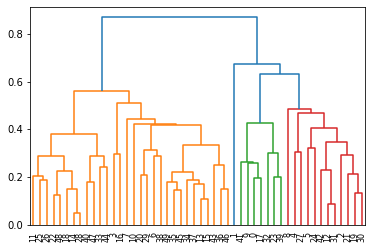

In [8]:
dendrogram = hierarchy.dendrogram(hierarchy.linkage(data_norm, method = 'average'))

In [9]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='complete')

In [10]:
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [11]:
y_hc = hc.fit_predict(data_norm)

In [12]:
y_hc

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1])

In [13]:
data['cluster_id'] = hc.labels_


In [14]:
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_id
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


K-means

In [15]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [16]:
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_id
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [17]:
data.rename({'cluster_id':'Hierarchichal_clustering'}, axis=1)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Hierarchichal_clustering
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [18]:
data_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


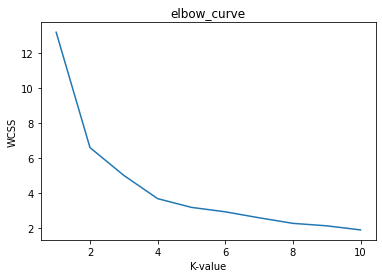

In [20]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data_norm)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('elbow_curve')
plt.xlabel('K-value')
plt.ylabel('WCSS')
plt.show()


In [32]:
model = KMeans(n_clusters=4, init='k-means++',random_state =340)
model.fit(data_norm)
model.labels_

array([2, 1, 1, 2, 1, 1, 3, 3, 1, 2, 3, 0, 1, 3, 0, 3, 0, 2, 0, 1, 3, 1,
       0, 2, 3, 0, 0, 1, 0, 3, 1, 1, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 1, 3,
       0, 3, 3, 0, 0, 3], dtype=int32)

In [33]:
K_means_clustering = pd.Series(model.labels_)

In [34]:
data['K_means_clustering'] = K_means_clustering

In [35]:
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_id,K_means_clustering,y_kmeans
0,Alabama,13.2,236,58,21.2,0,2,2
1,Alaska,10.0,263,48,44.5,0,1,1
2,Arizona,8.1,294,80,31.0,0,1,1
3,Arkansas,8.8,190,50,19.5,1,2,2
4,California,9.0,276,91,40.6,0,1,1
5,Colorado,7.9,204,78,38.7,0,1,1
6,Connecticut,3.3,110,77,11.1,1,3,3
7,Delaware,5.9,238,72,15.8,1,3,3
8,Florida,15.4,335,80,31.9,0,1,1
9,Georgia,17.4,211,60,25.8,0,2,2


In [36]:
y_kmeans = model.fit_predict(data_norm)

In [37]:
y_kmeans

array([2, 1, 1, 2, 1, 1, 3, 3, 1, 2, 3, 0, 1, 3, 0, 3, 0, 2, 0, 1, 3, 1,
       0, 2, 3, 0, 0, 1, 0, 3, 1, 1, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 1, 3,
       0, 3, 3, 0, 0, 3], dtype=int32)

In [38]:
model.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951]])

In [39]:
a = pd.Series(y_kmeans)

In [40]:
data['y_kmeans'] = a

In [41]:
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_id,K_means_clustering,y_kmeans
0,Alabama,13.2,236,58,21.2,0,2,2
1,Alaska,10.0,263,48,44.5,0,1,1
2,Arizona,8.1,294,80,31.0,0,1,1
3,Arkansas,8.8,190,50,19.5,1,2,2
4,California,9.0,276,91,40.6,0,1,1
5,Colorado,7.9,204,78,38.7,0,1,1
6,Connecticut,3.3,110,77,11.1,1,3,3
7,Delaware,5.9,238,72,15.8,1,3,3
8,Florida,15.4,335,80,31.9,0,1,1
9,Georgia,17.4,211,60,25.8,0,2,2


In [48]:
df0 = data[data.y_kmeans ==0]
df1 = data[data.y_kmeans ==1]
df2 = data[data.y_kmeans ==2]
df3 = data[data.y_kmeans ==3]


In [49]:
df0

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_id,K_means_clustering,y_kmeans
11,Idaho,2.6,120,54,14.2,2,0,0
14,Iowa,2.2,56,57,11.3,2,0,0
16,Kentucky,9.7,109,52,16.3,1,0,0
18,Maine,2.1,83,51,7.8,2,0,0
22,Minnesota,2.7,72,66,14.9,1,0,0
25,Montana,6.0,109,53,16.4,2,0,0
26,Nebraska,4.3,102,62,16.5,2,0,0
28,New Hampshire,2.1,57,56,9.5,2,0,0
33,North Dakota,0.8,45,44,7.3,2,0,0
40,South Dakota,3.8,86,45,12.8,2,0,0


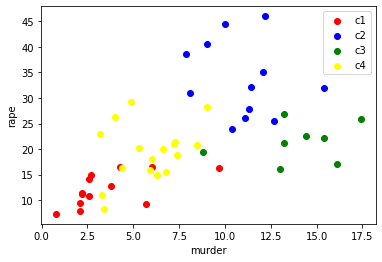

In [52]:
plt.scatter(df0['Murder'],df0['Rape'],color='red',label = 'c1')
plt.scatter(df1['Murder'],df1['Rape'],color='blue',label = 'c2')
plt.scatter(df2['Murder'],df2['Rape'],color='green',label = 'c3')
plt.scatter(df3['Murder'],df3['Rape'],color='yellow',label = 'c4')
plt.xlabel('murder')
plt.ylabel('rape')
plt.legend()
plt.show()



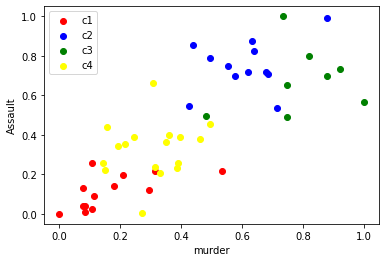

In [79]:
plt.scatter(df0['Murder'],df0['Assault'],color='red',label = 'c1')
plt.scatter(df1['Murder'],df1['Assault'],color='blue',label = 'c2')
plt.scatter(df2['Murder'],df2['Assault'],color='green',label = 'c3')
plt.scatter(df3['Murder'],df3['Assault'],color='yellow',label = 'c4')
plt.xlabel('murder')
plt.ylabel('Assault')
plt.legend()
plt.show()


In [53]:
data_norm['y_kmeans'] = y_kmeans

In [54]:
df0 = data_norm[data_norm.y_kmeans ==0]
df1 = data_norm[data_norm.y_kmeans ==1]
df2 = data_norm[data_norm.y_kmeans ==2]
df3 = data_norm[data_norm.y_kmeans ==3]


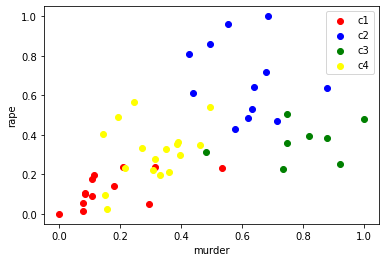

In [55]:
plt.scatter(df0['Murder'],df0['Rape'],color='red',label = 'c1')
plt.scatter(df1['Murder'],df1['Rape'],color='blue',label = 'c2')
plt.scatter(df2['Murder'],df2['Rape'],color='green',label = 'c3')
plt.scatter(df3['Murder'],df3['Rape'],color='yellow',label = 'c4')
plt.xlabel('murder')
plt.ylabel('rape')
plt.legend()
plt.show()

In [58]:
table = data.iloc[:,[1,2,3,4]].groupby(data.y_kmeans).mean()

In [59]:
table

,Murder,Assault,UrbanPop,Rape
y_kmeans,,,,
0,3.600000,78.538462,52.076923,12.176923
1,10.966667,264.000000,76.500000,33.608333
2,13.937500,243.625000,53.750000,21.412500
3,5.852941,141.176471,73.647059,19.335294


DB-scan

In [60]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [61]:
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_id,K_means_clustering,y_kmeans
0,Alabama,13.2,236,58,21.2,0,2,2
1,Alaska,10.0,263,48,44.5,0,1,1
2,Arizona,8.1,294,80,31.0,0,1,1
3,Arkansas,8.8,190,50,19.5,1,2,2
4,California,9.0,276,91,40.6,0,1,1
5,Colorado,7.9,204,78,38.7,0,1,1
6,Connecticut,3.3,110,77,11.1,1,3,3
7,Delaware,5.9,238,72,15.8,1,3,3
8,Florida,15.4,335,80,31.9,0,1,1
9,Georgia,17.4,211,60,25.8,0,2,2


In [70]:
data_array =data.iloc[:,1:5].values

In [71]:
y = StandardScaler().fit_transform(data_array)

In [72]:
y

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [73]:
dbscan = DBSCAN(eps=2,min_samples=5)

In [76]:
y_dbscan = dbscan.fit_predict(y)

In [77]:
y_dbscan

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [80]:
y_dbscan = pd.Series(y_dbscan)

In [81]:
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_id,K_means_clustering,y_kmeans
0,Alabama,13.2,236,58,21.2,0,2,2
1,Alaska,10.0,263,48,44.5,0,1,1
2,Arizona,8.1,294,80,31.0,0,1,1
3,Arkansas,8.8,190,50,19.5,1,2,2
4,California,9.0,276,91,40.6,0,1,1
5,Colorado,7.9,204,78,38.7,0,1,1
6,Connecticut,3.3,110,77,11.1,1,3,3
7,Delaware,5.9,238,72,15.8,1,3,3
8,Florida,15.4,335,80,31.9,0,1,1
9,Georgia,17.4,211,60,25.8,0,2,2


In [84]:
data.rename({'cluster_id':'Hierarchical_clustering'},axis=1,inplace=True)

In [86]:
data.drop('K_means_clustering', axis=1,inplace=True)

In [87]:
data['y_dbscan'] = y_dbscan

In [88]:
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Hierarchical_clustering,y_kmeans,y_dbscan
0,Alabama,13.2,236,58,21.2,0,2,0
1,Alaska,10.0,263,48,44.5,0,1,-1
2,Arizona,8.1,294,80,31.0,0,1,0
3,Arkansas,8.8,190,50,19.5,1,2,0
4,California,9.0,276,91,40.6,0,1,0
5,Colorado,7.9,204,78,38.7,0,1,0
6,Connecticut,3.3,110,77,11.1,1,3,0
7,Delaware,5.9,238,72,15.8,1,3,0
8,Florida,15.4,335,80,31.9,0,1,0
9,Georgia,17.4,211,60,25.8,0,2,0
